In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from figures import figures
from distances import distances
from waveforms import waveforms

In [2]:
cosmo_params = {
    'redshift' : np.linspace(0,12),
    'frequency': np.linspace(10**0,10**4),
    'f_e' : 1,
    't_e' : 1,
    't_a' : 2,
}
phenom_params = {
    'A' : 4, 
    'alpha' : 4,
    'lambda_g' : 1.6 * 10 ** 16,
} 
wf_params = {
        'approximant': 'TaylorF2',
        'mass1': 10,
        'mass2': 15,
        'delta_f': 1.0 / 170, 
        'f_lower': 40,
}

In [3]:
fig = figures(cosmo_params, phenom_params, wf_params)

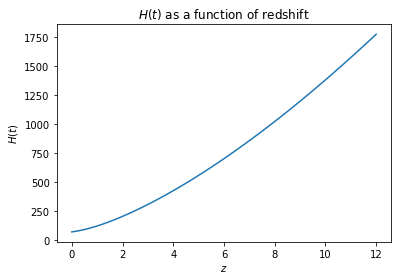

In [4]:
fig.scale_factor()

In [5]:
# plt.alpha_distance_ratio()
# change to gradient to show which appears more red/blue-shifted
# smaller values of alpha would make object appear more blueshifted (gets to high redshift faster)

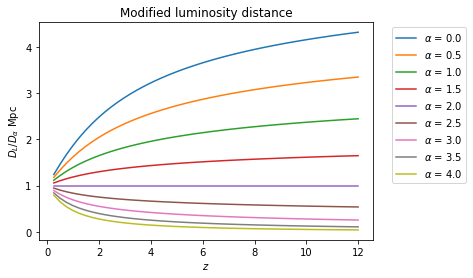

In [6]:
dist = distances(cosmo_params, phenom_params)

alpha_values = np.arange(0, 4.5, .5)  # alpha values end at 4, per GR tests paper specs
for a in alpha_values: 
    D_l = dist.luminosity(dist.z)
    D_a = dist.mod_luminosity(dist.z, a)
    results = np.divide(D_l[1:], D_a[1:])  # division by zero error, skip first element
    # results = np.insert(results, 0, 0, axis=None)
    plt.plot(np.hstack(np.linspace(0,12)[1:]), np.hstack(results), label=r'$\alpha$ = '+str(a))#, c=colors.Colormap('coolwarm'))

plt.xlabel(r'$z$')
plt.ylabel(r'$D_L / D_{\alpha}$ Mpc')
plt.title('Modified luminosity distance')
    # handles, labels = plt.gca().get_legend_handles_labels()
    # plt.gca().legend(handles=handles[::-1], labels=labels[::-1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

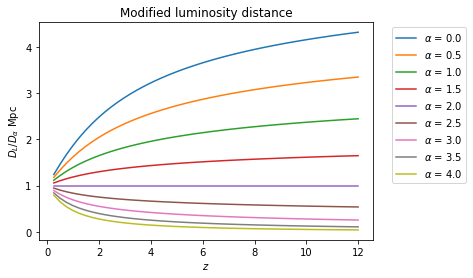

In [7]:
fig.alpha_distance_ratio()

In [8]:
dist.alpha

4

In [9]:
dist.A

4

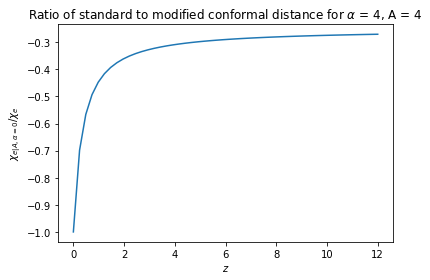

In [10]:
fig.chi_ratio()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)
/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:138: RuntimeWarning: invalid value encountered in multiply
  return [arr[i].real for i in range(len(self.f))], [arr[j].imag * 1j for j in range(len(self.f))]


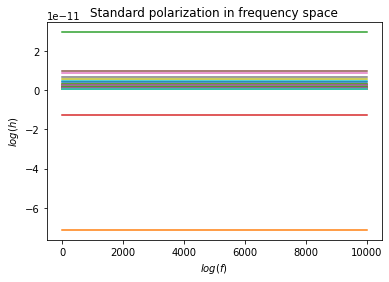

In [11]:
fig.h_standard()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)
/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:71: RuntimeWarning: divide by zero encountered in power
  term_ii = D_alpha / np.power(self.lambda_A(), (2 - self.alpha))


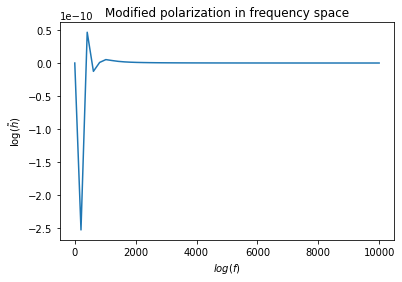

In [12]:
fig.h_modified()

In [13]:
# fig.phase_check()

In [14]:
DF = 1.0 / 320

cosmo_params_upd = {
    'redshift' : np.linspace(0,12, int(320 / DF)),
    'frequency': np.linspace(30, 350, int(320 / DF)),
    'f_e' : 1,
    't_e' : 1,
    't_a' : 2,
}
phenom_params_upd = {
    'A' : 4, 
    'alpha' : 4,
    'lambda_g' : 1.6 * 10 ** 16,
} 
wf_params_upd = {
        'approximant': 'Waveform',
        'mass1': 30 * 4.925 * 10e-6,
        'mass2': 30 * 4.925 * 10e-6,
        'delta_f': DF, 
        'f_lower': 40,
}

In [15]:
fig = figures(cosmo_params_upd, phenom_params_upd, wf_params_upd)

In [16]:
wf = waveforms(cosmo_params_upd, phenom_params_upd, wf_params_upd)

In [17]:
len(wf.z)

102400

In [18]:
len(wf.f)

102400

In [19]:
len(wf.gr_phase())

102400

In [20]:
len(wf.gr_amplitude())

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)


102400

In [ ]:
# calculate inner product
phi_r, phi_i = wf.h_standard()
ip = np.lib.scimath.sqrt(phi_i * np.conj(phi_i))  # sqrt(-r) in R -> i*sqrt(r) in C
phase = phi_i / ip

In [ ]:
len(ip)

In [ ]:
# plot A(f) - which should equal inner product
plt.subplot(2, 1, 1)
plt.plot(wf.f, ip)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [ ]:
# plot e^(i*Psi) - calculated as phi / mag(phi)
plt.subplot(2, 1, 2)
plt.plot(wf.f, phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')

plt.show()

In [ ]:
#h_tilde, _ = wf.h_modified()
#len(h_tilde)

In [ ]:
h, phi_i = wf.h_standard()
len(h)

In [ ]:
len(wf.f)

In [ ]:
fig.phase_check(h, phi_i)